In [112]:
# General packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
from bs4 import BeautifulSoup

# NLP packages
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 14, 6
plt.style.use('ggplot')

In [113]:
def read_data(folder):
    df = pd.DataFrame()
    labels = {'pos': 1, 'neg': 0}
    for l in ('pos', 'neg'):
        path = os.path.join(folder, l)
        for file in os.listdir (path) :
            with open(os.path.join(path, file),'r', encoding='utf-8') as infile:
                txt = infile.read()
                df = df.append([[txt, labels[l]]],ignore_index=True)
    df.columns = ['review', 'sentiment']
    return df

"def read_data(folder):\n    df = pd.DataFrame()\n    labels = {'pos': 1, 'neg': 0}\n    for l in ('pos', 'neg'):\n        path = os.path.join(folder, l)\n        for file in os.listdir (path) :\n            with open(os.path.join(path, file),'r', encoding='utf-8') as infile:\n                txt = infile.read()\n                df = df.append([[txt, labels[l]]],ignore_index=True)\n    df.columns = ['review', 'sentiment']\n    return df\n"

In [114]:
# train = read_data('./Imdb/train')
# test = read_data('./Imdb/test')

In [115]:
# train.to_csv('train.csv',index = False)
# test.to_csv('test.csv', index = False)

In [116]:
# It's a movie review sentiment dataset
train = pd.read_csv('train.csv')
train.head()

,review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [117]:
train['review'].values[0]

'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'

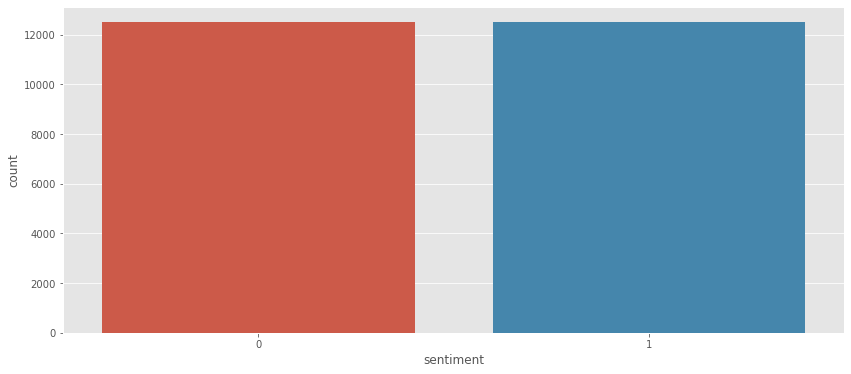

In [118]:
sns.countplot(data = train, x = 'sentiment')

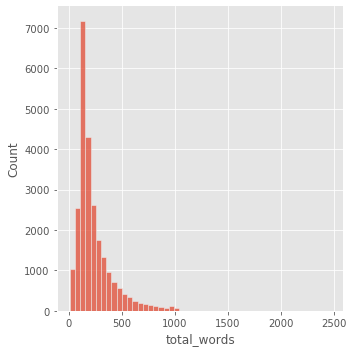

In [119]:
train['total_words'] = train['review'].apply(lambda x: len(x.split(' ')))
sns.displot(train,x = 'total_words',bins = 50)

In [120]:
train['total_words'].mean()

233.77672

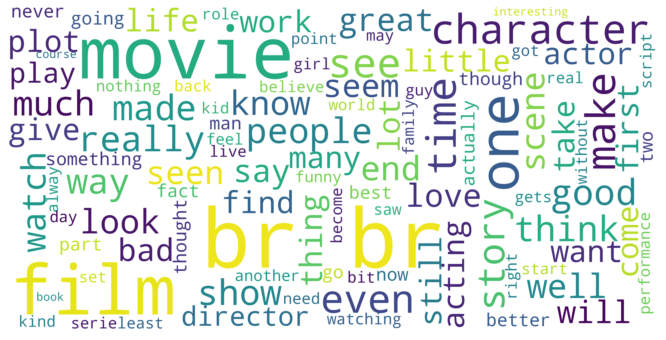

In [121]:
# Most frequent words
word_cloud_text = ''.join(train['review'])

wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                      max_words=100, # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=800, # Width of the canvas
                      height=400 # Height of the canvas
                     ).generate(word_cloud_text)

plt.figure()
plt.imshow(wordcloud, 
           interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.show()

In [122]:
# nltk.download('punkt')
from nltk import word_tokenize

def unique_tokens(column):
    token_lists = [word_tokenize(each) for each in column]
    tokens = [item for sublist in token_lists for item in sublist]
    print("Number of unique tokens then: ",len(set(tokens)))

In [123]:
# Convert everything into lowercase words
train['review_lower'] = train['review'].apply(lambda x: x.lower())

In [124]:
train.head()

,review,sentiment,total_words,review_lower
0,Bromwell High is a cartoon comedy. It ran at t...,1,140,bromwell high is a cartoon comedy. it ran at t...
1,Homelessness (or Houselessness as George Carli...,1,428,homelessness (or houselessness as george carli...
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,147,brilliant over-acting by lesley ann warren. be...
3,This is easily the most underrated film inn th...,1,124,this is easily the most underrated film inn th...
4,This is not the typical Mel Brooks film. It wa...,1,120,this is not the typical mel brooks film. it wa...


In [125]:
# Removing special characters
# html tags
# http links
def fun(x):
    x = re.sub('http\S+', ' ', x)
    x = BeautifulSoup(x, 'html.parser')
    x = x.get_text()
    # if u only wnat to remove special characters
    # x = re.sub('[^A-Za-z0-9]+', ' ', x) 
    x = re.sub('[^A-Za-z]+', ' ', x)
    return x
train['review_lower'] = train['review_lower'].apply(fun)

In [126]:
train['review_lower'].values[0]

'bromwell high is a cartoon comedy it ran at the same time as some other programs about school life such as teachers my years in the teaching profession lead me to believe that bromwell high s satire is much closer to reality than is teachers the scramble to survive financially the insightful students who can see right through their pathetic teachers pomp the pettiness of the whole situation all remind me of the schools i knew and their students when i saw the episode in which a student repeatedly tried to burn down the school i immediately recalled at high a classic line inspector i m here to sack one of your teachers student welcome to bromwell high i expect that many adults of my age think that bromwell high is far fetched what a pity that it isn t '

In [127]:
from nltk.corpus import stopwords

print('Available languages for NLTK v.3.4.5: ')
print(stopwords.fileids())

Available languages for NLTK v.3.4.5: 
['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [128]:
eng_stop_words = stopwords.words('english')
eng_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [129]:
review = train['review_lower'].values[0]
print('Original :',review)
print('\n')
words = nltk.word_tokenize(review)
sentence = ''
for word in words:
    if word not in eng_stop_words:
        sentence+=' '+word
print("Removed Stop Words :",sentence)

Original : bromwell high is a cartoon comedy it ran at the same time as some other programs about school life such as teachers my years in the teaching profession lead me to believe that bromwell high s satire is much closer to reality than is teachers the scramble to survive financially the insightful students who can see right through their pathetic teachers pomp the pettiness of the whole situation all remind me of the schools i knew and their students when i saw the episode in which a student repeatedly tried to burn down the school i immediately recalled at high a classic line inspector i m here to sack one of your teachers student welcome to bromwell high i expect that many adults of my age think that bromwell high is far fetched what a pity that it isn t 


Removed Stop Words :  bromwell high cartoon comedy ran time programs school life teachers years teaching profession lead believe bromwell high satire much closer reality teachers scramble survive financially insightful studen

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Creating a python object of the class CountVectorizer
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize, # type of tokenization
                               stop_words= eng_stop_words, # List of stopwords
                               ngram_range=(1,1),# number of n-grams
                                max_features = 5000)

x = tfidf_counts.fit_transform(train['review_lower'])

In [131]:
#X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(tfidf_data, # Features
#                                                                    train['sentiment'], # Target variable
#                                                                    test_size = 0.2, # 20% test size
#                                                                    random_state = 0) # random state for replication purposes
y = train['sentiment']

In [132]:
### Training the model 
lr_model_all = LogisticRegression() # Logistic regression
lr_model_all.fit(x,y) # Fitting a logistic regression model

## Predicting the output
# test_pred_lr_all = lr_model_all.predict(X_test_bow) # Class prediction

## Calculate key performance metrics
# print("F1 score: ", f1_score(y_test_bow, test_pred_lr_all))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
# Test data
test = pd.read_csv('test.csv')
test['review_lower'] = test['review'].apply(lambda x: x.lower())

In [134]:
test['review_lower'] = test['review_lower'].apply(fun)

In [135]:
test['review_lower'].values[0]

'i went and saw this movie last night after being coaxed to by a few friends of mine i ll admit that i was reluctant to see it because from what i knew of ashton kutcher he was only able to do comedy i was wrong kutcher played the character of jake fischer very well and kevin costner played ben randall with such professionalism the sign of a good movie is that it can toy with our emotions this one did exactly that the entire theater which was sold out was overcome by laughter during the first half of the movie and were moved to tears during the second half while exiting the theater i not only saw many women in tears but many full grown men as well trying desperately not to let anyone see them crying this movie was great and i suggest that you go see it before you judge '

In [136]:
x_test = tfidf_counts.transform(test['review_lower'])
y_test = test['sentiment']

In [137]:
x_test.shape

(25000, 5000)

In [138]:
# Predict on text data
test_pred_lr_all = lr_model_all.predict(x_test)
print("F1 score: ", f1_score(test['sentiment'], test_pred_lr_all))

F1 score:  0.8824490772113045


In [139]:
from sklearn.metrics import classification_report
y_test_predict = lr_model_all.predict(x_test)
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12500
           1       0.88      0.89      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [140]:
# Words driving for positive review
lr_weights = pd.DataFrame(list(zip(tfidf_counts.get_feature_names(), # ge tall the n-gram feature names
                                   lr_model_all.coef_[0])), # get the logistic regression coefficients
                          columns= ['words','weights']) # defining the colunm names

lr_weights.sort_values(['weights'], ascending = False)[:15] # top-15 more important features for positive reviews

,words,weights
1937,great,6.123406
1517,excellent,5.886384
3210,perfect,4.744844
405,best,4.689364
4930,wonderful,4.472897
147,amazing,4.025256
1636,favorite,3.965253
4859,well,3.629820
2640,loved,3.533792
1818,fun,3.372446


In [141]:
# Words driving for negative review
lr_weights = pd.DataFrame(list(zip(tfidf_counts.get_feature_names(), # ge tall the n-gram feature names
                                   lr_model_all.coef_[0])), # get the logistic regression coefficients
                          columns= ['words','weights']) # defining the colunm names

lr_weights.sort_values(['weights'], ascending = True)[:30] # top-15 more important features for positive reviews

,words,weights
4955,worst,-8.933537
321,bad,-6.719931
4825,waste,-6.545492
310,awful,-6.353659
481,boring,-5.619825
3318,poor,-5.007784
4433,terrible,-4.528466
4954,worse,-4.523090
3033,nothing,-4.498091
3319,poorly,-4.421729


In [142]:
# Predict sentimant of custom review
text = 'Inspirational but boring'
x = tfidf_counts.transform([text])
lr_model_all.predict(x)

array([0], dtype=int64)